In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import FileLink
import os
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [2]:
cases=pd.DataFrame(data=[],columns=['ddl_case_id','year','state_code'])
cases=cases.set_index('ddl_case_id')

for i in range(0,9):
    yearData=pd.read_csv('/kaggle/input/indian-courtcase-data/cases/cases/cases_201%d.csv'%i,index_col='ddl_case_id',usecols=['ddl_case_id','year','state_code'],dtype={'ddl_case_id':'str','year':'str','state_code':'str'})
    cases=cases.append(yearData.sample(n=2000000))
    del yearData
    gc.collect()
    print('year 201%d processed'%i)

print(cases.shape)
cases['year'].unique()

year 2010 processed
year 2011 processed
year 2012 processed
year 2013 processed
year 2014 processed
year 2015 processed
year 2016 processed
year 2017 processed
year 2018 processed
(18000000, 2)


array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'], dtype=object)

In [3]:
cases.head()

,year,state_code
ddl_case_id,,
13-08-02-203426006282011,2010,13
01-02-01-200702001962010,2010,01
17-31-15-230900003482010,2010,17
02-17-24-202100000502010,2010,02
22-18-01-200415000442010,2010,22


In [4]:
cdata=pd.read_csv('/kaggle/input/indian-courtcase-data/acts_sections/acts_sections.csv',index_col='ddl_case_id',usecols=['ddl_case_id','criminal'])
cdata.head()

,criminal
ddl_case_id,
06-03-02-210100004042014,1
23-34-01-229900001012019,1
13-18-03-204000030972016,1
23-28-01-220102000232016,1
01-35-05-203007002652012,1


In [ ]:
data=pd.merge(cdata,cases,left_index=True,right_index=True)
print(data.shape)
data.to_csv('/kaggle/working/criminalCaseRate.csv')
data.head()

In [7]:
del cdata
del cases
gc.collect()

217

In [8]:
data.shape

(13459305, 3)

In [9]:
data.head()

,criminal,year,state_code
ddl_case_id,,,
08-11-01-215200008432018,1,2018,08
14-05-03-203800308092014,1,2012,14
14-16-04-204100002352015,1,2015,14
16-21-04-201600016112016,1,2016,16
03-04-01-205200000032010,1,2010,03


criminal       int64
year          object
state_code     int64
dtype: object

<AxesSubplot:xlabel='year', ylabel='count'>

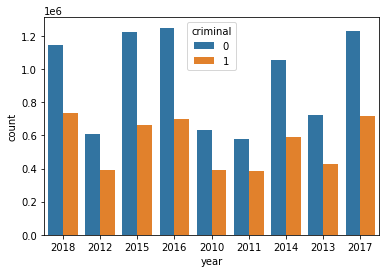

In [2]:



data=pd.read_csv('/kaggle/working/criminalCaseRate.csv',index_col='ddl_case_id',dtype={'ddl_case_id':'str','criminal':'int','year':'str'})
display(data.dtypes)

<AxesSubplot:xlabel='year', ylabel='count'>

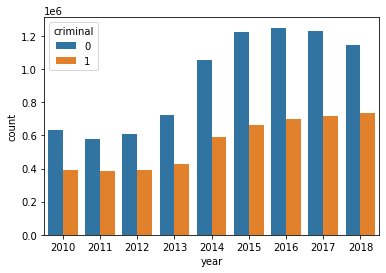

In [3]:
yearOrder=[]
for i in range(0,9):
    yearOrder.append('201%d'%i)
    
sns.countplot(data=data,x='year',hue='criminal',order=yearOrder)

[Text(0, 0, 'Bihar'),
 Text(1, 0, 'Haryana'),
 Text(2, 0, 'West Bengal'),
 Text(3, 0, 'Karnataka'),
 Text(4, 0, 'Maharashtra'),
 Text(5, 0, 'Orissa'),
 Text(6, 0, 'Assam'),
 Text(7, 0, 'Andhra Pradesh'),
 Text(8, 0, 'Madhya Pradesh'),
 Text(9, 0, 'Uttar Pradesh'),
 Text(10, 0, 'Delhi'),
 Text(11, 0, 'Gujarat'),
 Text(12, 0, 'Kerala'),
 Text(13, 0, 'Telangana'),
 Text(14, 0, 'Chhattisgarh'),
 Text(15, 0, 'Punjab'),
 Text(16, 0, 'Rajasthan'),
 Text(17, 0, 'Tamil Nadu'),
 Text(18, 0, 'Himachal Pradesh'),
 Text(19, 0, 'Jharkhand'),
 Text(20, 0, 'Manipur'),
 Text(21, 0, 'Jammu and Kashmir'),
 Text(22, 0, 'Sikkim'),
 Text(23, 0, 'Tripura'),
 Text(24, 0, 'Chandigarh'),
 Text(25, 0, 'Uttarakhand'),
 Text(26, 0, 'Goa'),
 Text(27, 0, 'Meghalaya'),
 Text(28, 0, 'DNH at Silvasa'),
 Text(29, 0, 'Mizoram'),
 Text(30, 0, 'Diu and Daman'),
 Text(31, 0, 'Ladakh')]

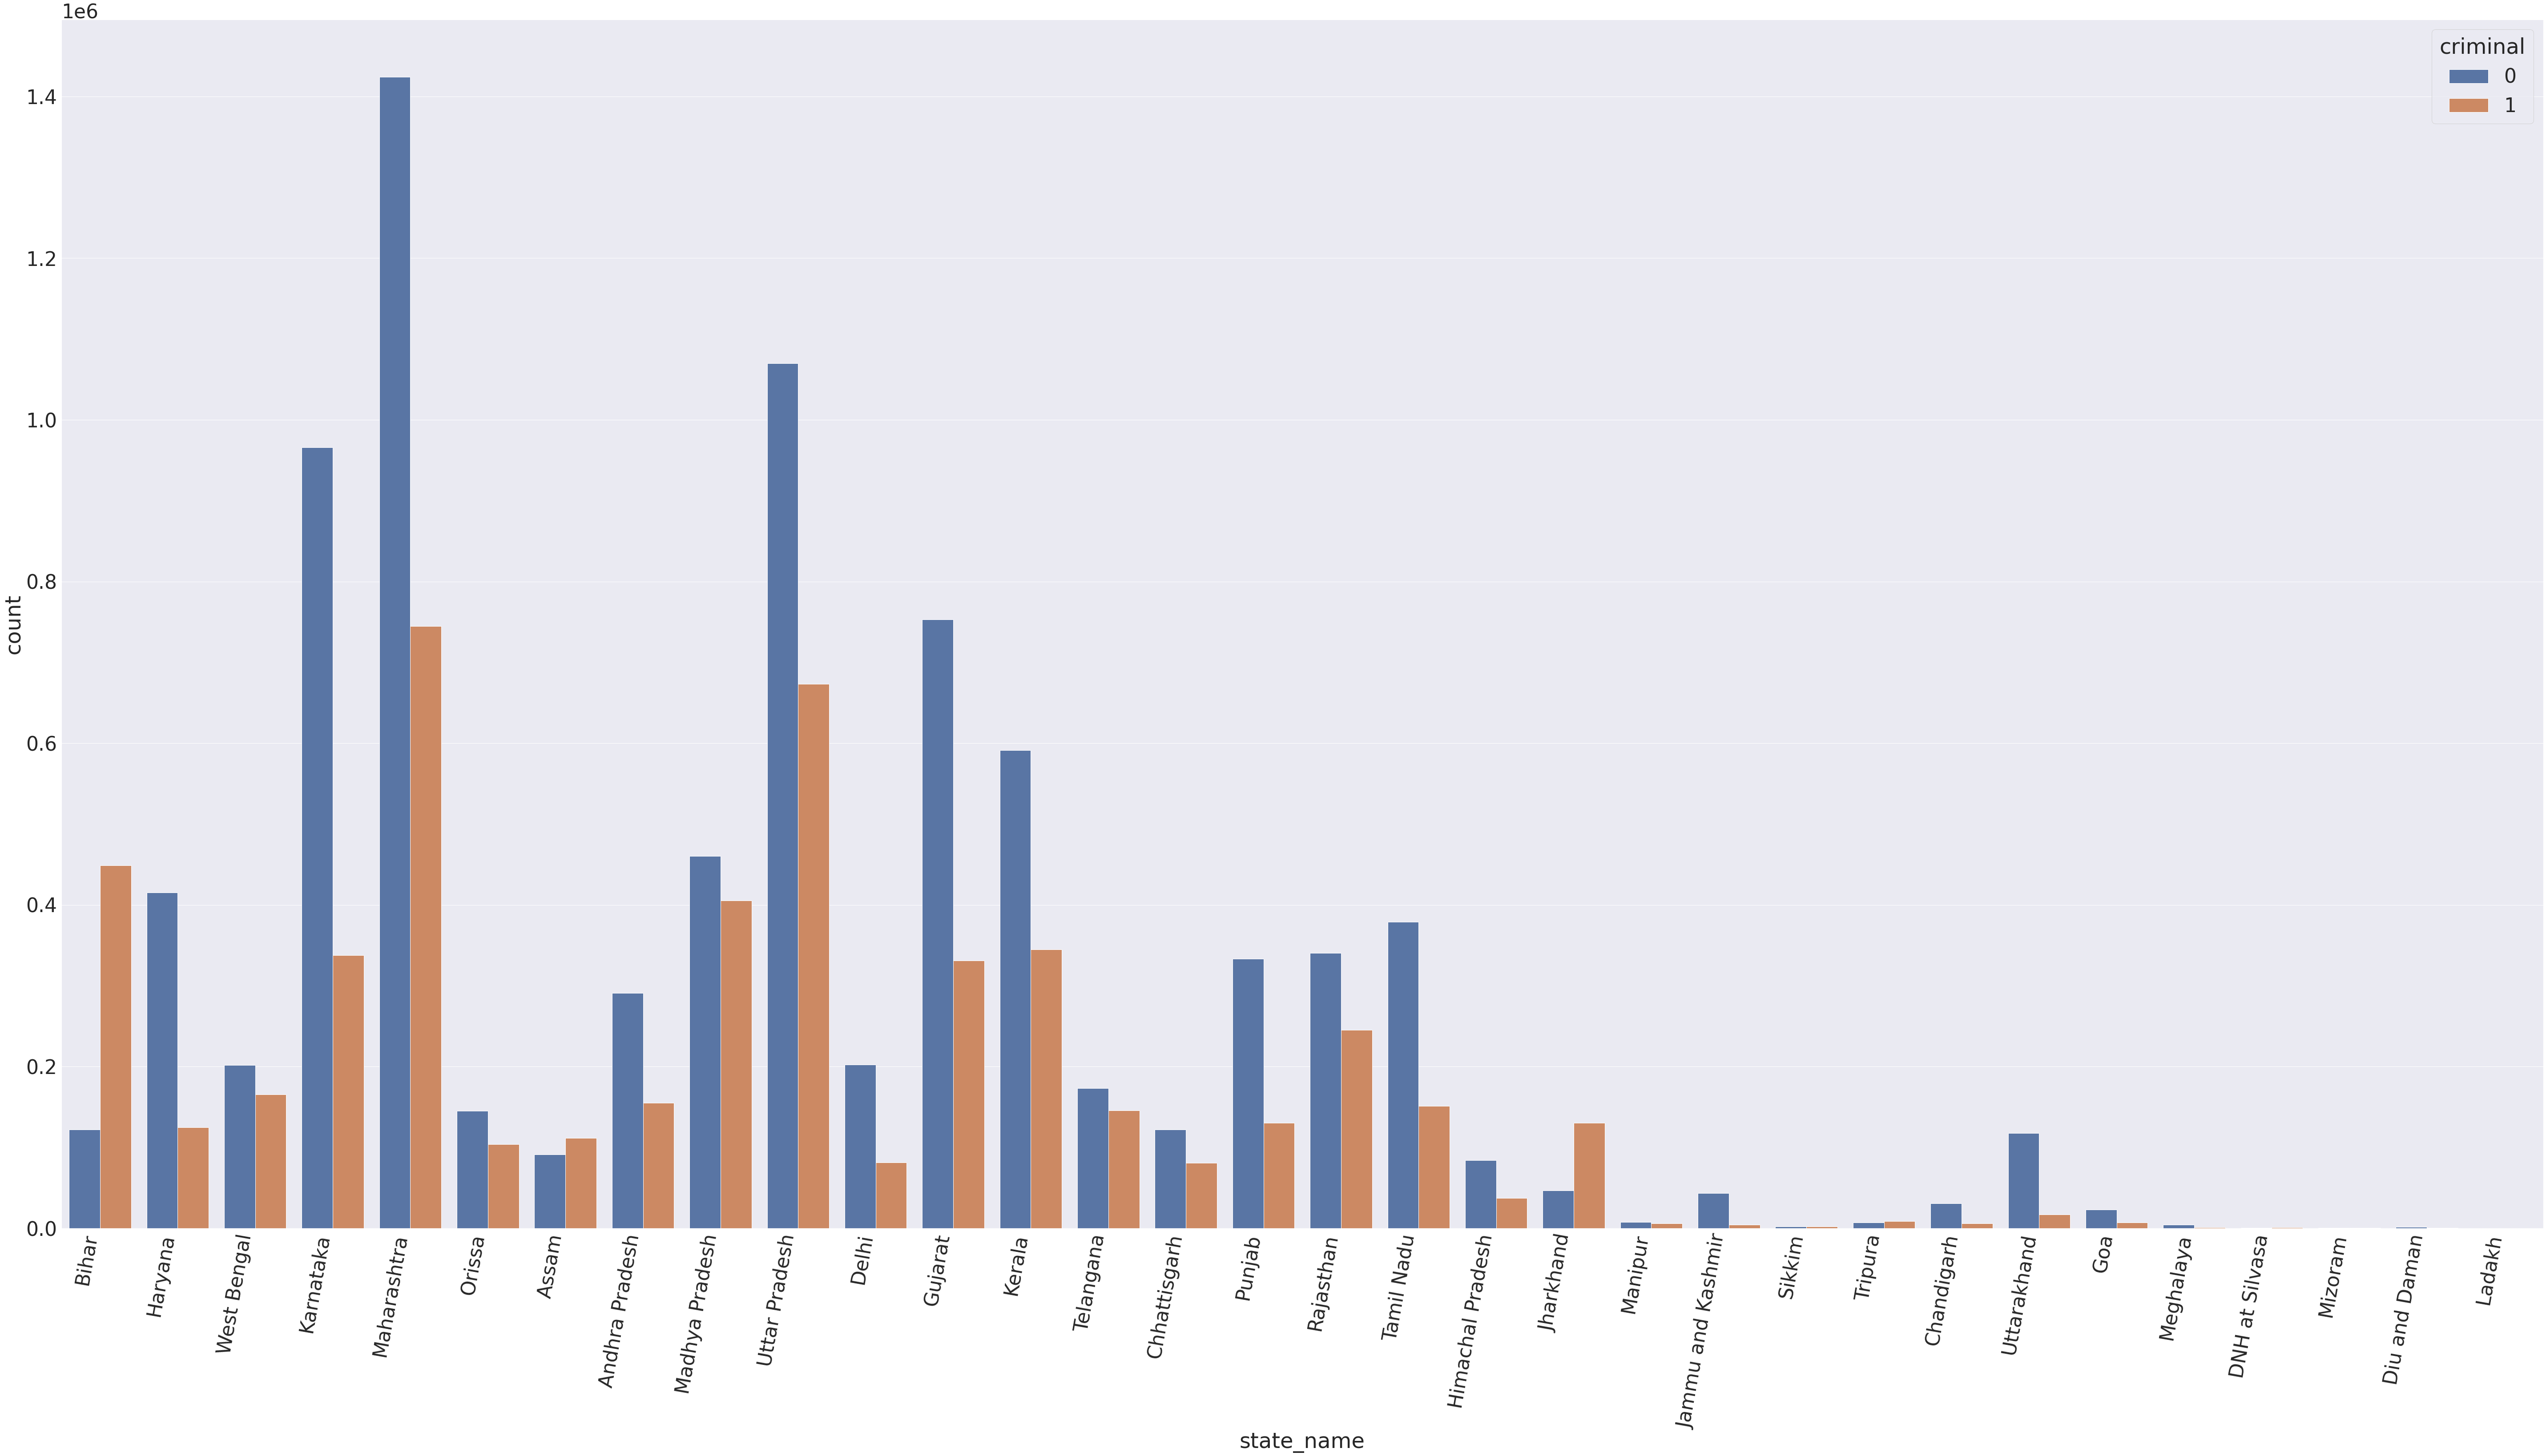

In [7]:


state_names=pd.read_csv('/kaggle/input/indian-courtcase-data/keys/keys/cases_state_key.csv',usecols=['year','state_code','state_name'],dtype={'year':'str'})

withStates=pd.merge(data,state_names)

fig,axes=plt.subplots(1,1,figsize=(100,50))
sns.set(font_scale=4)
l=sns.countplot(data=withStates,x='state_name',hue='criminal',ax=axes)
l.set_xticklabels(l.get_xticklabels(), rotation=80, ha="right")